In [24]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from pprint import pprint as pp

In [49]:
# utility function for pretty printing
def print_table(list_of_rows):
    for row in list_of_rows:
        for element in row:
            print(str(element)[:6],'\t\t', end='')
        print()

## Goal: Given some precision, `prec`, find a $\Delta t$ so that for a given velocity function `vel(t)`, `np.round(dist(t), prec)` does not change

In [2]:
a = -9.8 # m/sec**2
vel = lambda t : a * t

Define distance function, which takes in a time and a $\Delta t$, and performs the summation

$$
    S(t) = \displaystyle{\sum_{i=0}^{N}} \mbox{vel}(i \cdot \Delta t) \cdot \Delta t \mbox{ and, } N = \frac{t}{\Delta t}
$$

Further define a function `timeit` to time a method

In [3]:
def timeit(func, *args, **kwargs):
    def wrapper(*args, **kwargs):
        start_time = time()
        rval = func(*args, **kwargs) # just record the return value
        end_time = time()
        return (rval, end_time - start_time) # and append the execution time to rval
    return wrapper

In [4]:
def dist(t, dt):
    s = 0
    for i in range(int(t/dt)):
        s += vel(dt * i) * dt
    return s

In [6]:
dt   = 0.1
T    = 3.6
prec = 1

Calculate an initial result, stored in `last_result`, then multiply `dt` by $0.1$ and recalculate the result stored in `new_result`, and check if `last_result` and `new_result` are the same at the new `dt`

In [7]:
last_result = dist(T, dt)
while True:
    dt *= 0.1
    new_result = (dist(T, dt))

    if np.round(new_result, prec) == np.round(last_result, prec):
        print("Required delta t is", dt)
        print("last_result (dt = {}): {}".format(dt*10, last_result))
        print("new_result (dt = {}): {}".format(dt, new_result))
        break

    last_result = new_result

Required delta t is 0.00010000000000000003
last_result (dt = 0.0010000000000000002): -63.45108980000005
new_result (dt = 0.00010000000000000003): -63.498708098000066


Now create `midpoint_dist` which calcualtes the distance based on the following summation
$$
    S(t) = \displaystyle{\sum_{i=0}^{t/dt - 1}} \mbox{vel}(i\cdot \Delta t + \Delta t /2) \cdot \Delta t
$$

In [26]:
def midpoint_dist(t, dt):
    s = 0
    half_dt = dt/2

    for i in range(int(np.floor(t/dt))):
        s += vel(i * dt + half_dt) * dt
    return s

Now calculate the error for each by choosing smaller and smaller dt, and then seeing the speed at which the error goes down by plotting the difference between the value given by $1/2 a t^2$ and our calculation

In [9]:
sample_dt = np.array([0.1**(i+1) for i in range(7)])

actual_value = 1/2 * a * T**2
left_point_rule, midpoint_rule = [], []

for dt in sample_dt:
    print('working for dt =', dt)
    left_point_rule.append(dist(T, dt))
    midpoint_rule.append(midpoint_dist(T, dt))
    
# Difference b/w actual value and calculated value
error_mp = np.abs(actual_value - np.array(midpoint_rule))
error_lp = np.abs(actual_value - np.array(left_point_rule))

working for dt = 0.1
working for dt = 0.010000000000000002
working for dt = 0.0010000000000000002
working for dt = 0.00010000000000000002
working for dt = 1.0000000000000003e-05
working for dt = 1.0000000000000004e-06
working for dt = 1.0000000000000004e-07


Now plotting the error using each chosen value for $\Delta t$ for both rules

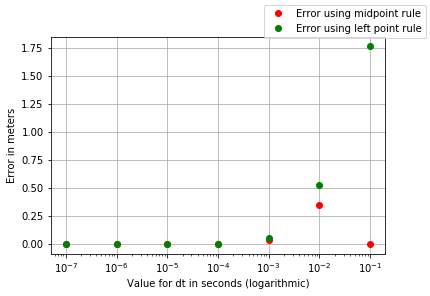

In [10]:
fig = plt.gcf()
ax  = plt.gca()

mp_plot, = ax.plot(sample_dt, error_mp, 'ro', label = "Error using midpoint rule")
lp_plot, = ax.plot(sample_dt, error_lp, 'go', label = "Error using left point rule")

ax.set_xlabel("Value for dt in seconds (logarithmic)")
ax.set_ylabel("Error in meters")
ax.set_xscale('log')
fig.legend()
ax.grid()
plt.show()

In [59]:
# What? How can these have literally zero error?
print(midpoint_dist(3.6, 0.1))
print(1/2 * a *  3.6**2)

l = [(n, 0.2*n, midpoint_dist(0.2*n, 0.1), 1/2 * a * (0.2*n)**2) for n in range(int(T/.2))]

print()
print('n\t\t0.2*n\t\tcalculated\tactual value')
print('='*60)
print_table(l)

-63.50400000000001
-63.50400000000001

n		0.2*n		calculated	actual value
0 		0.0 		0 		-0.0 		
1 		0.2 		-0.196 		-0.196 		
2 		0.4 		-0.784 		-0.784 		
3 		0.6000 		-1.764 		-1.764 		
4 		0.8 		-3.136 		-3.136 		
5 		1.0 		-4.900 		-4.9 		
6 		1.2000 		-7.056 		-7.056 		
7 		1.4000 		-9.604 		-9.604 		
8 		1.6 		-12.54 		-12.54 		
9 		1.8 		-15.87 		-15.87 		
10 		2.0 		-19.60 		-19.6 		
11 		2.2 		-23.71 		-23.71 		
12 		2.4000 		-28.22 		-28.22 		
13 		2.6 		-33.12 		-33.12 		
14 		2.8000 		-38.41 		-38.41 		
15 		3.0 		-44.10 		-44.1 		
16 		3.2 		-50.17 		-50.17 		
17 		3.4000 		-56.64 		-56.64 		


In [58]:
# Seems like works for "even" values, what about odd values
l = [(n, 0.1+(0.2*n), midpoint_dist(0.1+(0.2*n), 0.1), .5*a*(0.1+(0.2*n))**2) for n in range(int(T/.2))]

print()
print('n\t\t0.1+0.2*n\tcalculated\tactual value')
print('='*60)
print_table(l)


n		0.1+0.2*n	calculated	actual value
0 		0.1 		-0.049 		-0.049 		
1 		0.3000 		-0.441 		-0.441 		
2 		0.5 		-1.225 		-1.225 		
3 		0.7000 		-2.401 		-2.401 		
4 		0.9 		-3.969 		-3.969 		
5 		1.1 		-5.929 		-5.929 		
6 		1.3000 		-8.281 		-8.281 		
7 		1.5000 		-11.02 		-11.02 		
8 		1.7000 		-14.16 		-14.16 		
9 		1.9000 		-17.68 		-17.68 		
10 		2.1 		-21.60 		-21.60 		
11 		2.3000 		-25.92 		-25.92 		
12 		2.5000 		-30.62 		-30.62 		
13 		2.7 		-35.72 		-35.72 		
14 		2.9000 		-41.20 		-41.20 		
15 		3.1 		-47.08 		-47.08 		
16 		3.3000 		-53.36 		-53.36 		
17 		3.5000 		-60.02 		-60.02 		


Also works for "odd" values. 

## what in the hell is happening

...moving on like nothing at all happened,

Clearly the midpoint rule has lower error

> Note, in case of $10^{-1}$, I have no idea why the function `midpoint_dist` produces the exact same value as calculating using $\frac{1}{2} at^2$
>
> I want to figure that out

Let's try timing the two functions and plotting the time elapsed in each case

In [57]:
timed_dist = timeit(dist)
timed_midpoint_dist = timeit(midpoint_dist)

In [ ]:
timed_dist_rec      = []
timed_midpoint_dist_rec = []

for dt in sample_dt:
    timed_dist_rec.append( timed_dist(T, dt)[-1] )
    timed_midpoint_dist_rec.append( timed_midpoint_dist(T, dt)[-1] )

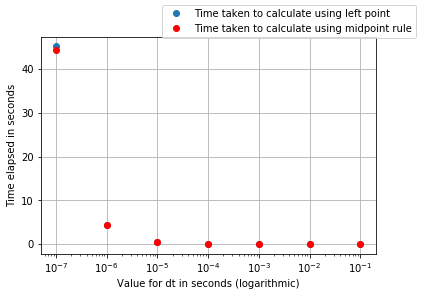

In [27]:
fig2 = plt.figure(1)
ax2  = fig2.gca()

ax2.plot(sample_dt, timed_dist_rec, 'o', label = "Time taken to calculate using left point")
ax2.plot(sample_dt, timed_midpoint_dist_rec, 'ro', label = "Time taken to calculate using midpoint rule")

ax2.set_xlabel("Value for dt in seconds (logarithmic)")
ax2.set_ylabel("Time elapsed in seconds")
ax2.set_xscale('log')
fig2.legend()
ax2.grid()
plt.show()

So seems like the midpoint method is actually running faster than the left point method and is also producing more accurate results